***: Importing important Libraries and Loading Dataset.***

*   Numpy:-      In this Project we are using 'Numpy' Library for Numbers Operation here.
*   Pandas:-     In this Project we are using 'Pandas' Library for EDA and data related task.
*   Matplotlib:- 'Matplotlib' we are using for Visualization Purpose.
*   Seaborn:-    With the help of 'Seaborn' we can visualize the data in advanced form.



In [1]:
# Importing all the needed libraries here.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset and printing first 5 rows.

dataset = pd.read_csv('wallmart.csv')
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


***: EDA :- Doing EDA Part overhere.***

In [3]:
# Checking how many rows and columns available in our dataset.

dataset.shape

(421570, 5)

In [4]:
# Checking if there's any null value available there or not.

dataset.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


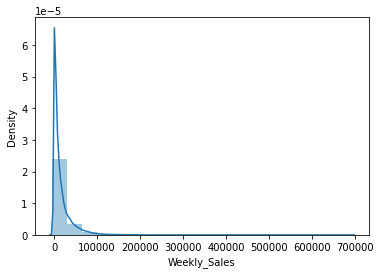

In [5]:
# With the help of 'Seaborn' Visualizing 'Weekly_Sales' in this Graph.

sns.distplot(dataset['Weekly_Sales'],bins=20)
plt.show()

In [6]:
# Converting categorical column in numeric dataset with the help of 'get_dummies()'.

is_holiday_dummies = pd.get_dummies(dataset.IsHoliday, prefix='Holiday')
dataset.IsHoliday = pd.concat([dataset, is_holiday_dummies], axis='columns' )


In [7]:
# printing first 5 rows.

dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,1
1,1,1,2010-02-12,46039.49,1
2,1,1,2010-02-19,41595.55,1
3,1,1,2010-02-26,19403.54,1
4,1,1,2010-03-05,21827.90,1


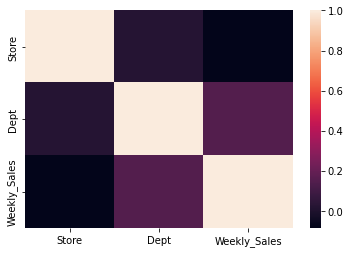

In [8]:
# Checking relation between feature (x) and label (y) columns.

correlation_between_columns = dataset.corr()
sns.heatmap(correlation_between_columns)

In [9]:
# Converting Date Column in Separate column 'Day, Month and Year' format..

dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Day'] = dataset['Date'].dt.day
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year
dataset.drop('Date', axis='columns', inplace=True)
dataset.head()

,Store,Dept,Weekly_Sales,IsHoliday,Day,Month,Year
0,1,1,24924.50,1,5,2,2010
1,1,1,46039.49,1,12,2,2010
2,1,1,41595.55,1,19,2,2010
3,1,1,19403.54,1,26,2,2010
4,1,1,21827.90,1,5,3,2010


In [10]:
# Creating a New Dataset for Training purpose and separating Features (X).

X = dataset[['Store','Dept','IsHoliday','Day','Month','Year']]
X.head()

,Store,Dept,IsHoliday,Day,Month,Year
0,1,1,1,5,2,2010
1,1,1,1,12,2,2010
2,1,1,1,19,2,2010
3,1,1,1,26,2,2010
4,1,1,1,5,3,2010


In [11]:
# Separating label (y).

y = dataset.loc[:, ['Weekly_Sales']]
y

,Weekly_Sales
0,24924.50
1,46039.49
2,41595.55
3,19403.54
4,21827.90
...,...
421565,508.37
421566,628.10
421567,1061.02
421568,760.01


In [12]:
# Importing 'train_test_split' from sklearn and splitting training and testing data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Printing training data here.

print(X_train)

        Store  Dept IsHoliday  Day  Month  Year
201850     21    32        21   21      1  2011
263688     27    58        27    3      9  2010
147390     15    94        15    1     10  2010
169866     18    19        18   22      6  2012
253398     26    55        26   29      4  2011
...       ...   ...       ...  ...    ...   ...
359783     38    87        38   21      9  2012
358083     38    59        38    5      3  2010
152315     16    32        16   21      1  2011
117952     13     3        13    1      4  2011
305711     32    14        32   19      3  2010

[337256 rows x 6 columns]


In [14]:
# Printing testing data.

print(X_test)

        Store  Dept IsHoliday  Day  Month  Year
233571     24    55        24    6      5  2011
88992      10    11        10   29     10  2010
367842     39    59        39   25      6  2010
184359     19    60        19   23      9  2011
26175       3    45         3   19      2  2010
...       ...   ...       ...  ...    ...   ...
392371     42    11        42    2      7  2010
389905     41    91        41   17      9  2010
406834     44    16        44    5      8  2011
118116     13     4        13   26      8  2011
329386     34    87        34   25     11  2011

[84314 rows x 6 columns]


***> Using Multiple Linear Regression Algorithm here:-*** 

In [15]:
# Importing 'linear_model' from sklearn library.

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [16]:
# Fitting the model on training dataset.

reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Checking the Prediction on test dataset.

y_pred = reg.predict(X_test)

In [18]:
# Importing 'r2_score' from sklearn.metrics for checking the accuracy score of our Model.

from sklearn.metrics import r2_score

In [19]:
# Checking the accuracy level of this Model.

r2_score(y_test, y_pred)

0.03133271256441372

***> Using KNN Regressor algorithm here:-***

In [20]:
# Importing 'KNeighborsRegressor' from sklearn library for KNN algorithm and Importing 'mean_squared_error' for checking the error rate.

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [21]:
# Fitting Model and also checking the error rate.

mse = []
r2 = []
for i in range(1,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse_i = mean_squared_error(y_test,y_pred)
    mse.append(mse_i)
    r2_i = r2_score(y_test,y_pred)
    r2.append(r2_i)
#     print('i = {}, mse = {} , r2 = {}'.format(i,mse_i,r2_i))

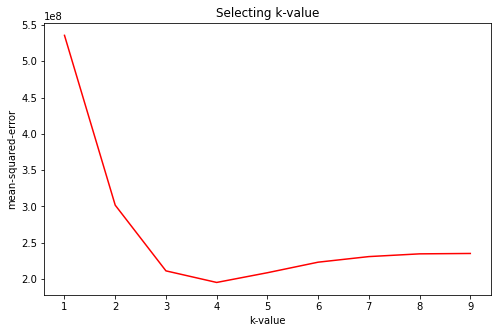

In [22]:
# Plotting the 'Error rate' vs 'K value' in Model with the help of Matplotlib library.

plt.figure(figsize = (8,5))
plt.plot(np.arange(1,10),mse,'r')
plt.xlabel('k-value')
plt.ylabel('mean-squared-error')
plt.title('Selecting k-value')
plt.show()

In [23]:
# Using best nearest neighbors value so it can provide better accuracy.

model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [24]:
# With the help of 'r2_score' checking the accuracy level of Model.

r2_score(y_test,y_pred)


0.6210010541997584

***> Using Decision Tree Regressor Algorithm here:-***

In [25]:
# Importing 'DecisionTreeRegressor' algorithm from sklearn library.

from sklearn.tree import DecisionTreeRegressor

In [26]:
# Creating Model on DecisionTree.

dtr = DecisionTreeRegressor()

In [27]:
# Fitting up Model on training dataset.

dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [28]:
# Checking the accuracy level of Model.

dtr.score(X_test, y_test)

0.9635572016199699

***> Using 'Random Forest Regressor' algorithm to check the accuracy level of this Model:-***

In [29]:
# Importing 'RandomForestRegressor' algorithm from sklearn library.

from sklearn.ensemble import RandomForestRegressor

In [30]:
# Creating a class and using RandomForestRegressor there..

rfr = RandomForestRegressor(n_estimators=50)

In [31]:
# Fitting up the Model there.

rfr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
# Checking the accuracy level of Our Model.

rfr.score(X_test, y_test)

0.9703370283656185

### ***: As we have use few algorithm here. So you can see the better accuracy level according to algorithm below:***



####*** Multiple Linear Regression** :- *As you have seen above in 'Multiple Linear Regression' it's providing accuracy level = 3%.*

####*** KNN Regressor** :- *As you have seen above in 'KNN Regressor' it's providing accuracy level = 62%.*

####*** Decision Tree Regressor** :- *As you have seen above in 'Decision Tree Regressor' it's providing accuracy level = 96%.*

####*** Random Forest Regressor** :- *As you have seen above in 'Random Forest Regressor' it's providing accuracy level = 97%.*


### ***Note:-*** ***So as it clearly mentioned that we are getting higher accuracy level from 'Random Forest Regressor'. So we'll use it for our Model.***





